### Counting letter bigrams in several languages

In [2]:
%matplotlib inline
from collections import defaultdict
from urllib.request import urlopen
import string
import numpy as np
import matplotlib.pyplot as plt

# Turkish
#"ç","ı","ğ","ö","ş","ü",'â'
# German
#"ä","ß","ö","ü"
# French
#"ù","û","ô","â","à","ç","é","è","ê","ë","î","ï","æ"
tr_alphabet = ['•','a','b','c','ç','d','e','f',
                'g','ğ','h','ı','i','j','k','l',
                'm','n','o','ö','p','q','r','s','ş',
                't','u','ü','w','v','x','y','z']
# Union of Frequent letters in French, Turkish, German and English
my_alphabet = ['•','a','â','ä',"à","æ",'b','c','ç','d','e',"é","è","ê","ë",'f',
                'g','ğ','h','ı','i',"î",'ï','j','k','l',
                'm','n','o','œ',"ô",'ö','p','q','r','s','ş',
                't','u','ù',"û",'ü','w','v','x','y','z','ß']
# Only ascii characters
ascii_alphabet = list('•'+string.ascii_lowercase)
# Reduction table from my alphabet to ascii
my2ascii_table = {
    ord('â'):"a",
    ord('ä'):"ae",
    ord("à"):"a",
    ord("æ"):"ae",
    ord('ç'):"c",
    ord("é"):"e",
    ord("è"):"e",
    ord("ê"):"e",
    ord("ë"):"e",
    ord('ğ'):"g",
    ord('ı'):"i",
    ord("î"):"i",
    ord('ï'):"i",
    ord('œ'):"oe",
    ord("ô"):"o",
    ord('ö'):"o",
    ord('ş'):"s",
    ord('ù'):"u",
    ord("û"):"u",
    ord('ü'):"u",
    ord('ß'):"ss"
    }
# Reduction table from my alphabet to frequent letters in turkish text
my2tr_table = {
    ord('â'):"a",
    ord('ä'):"ae",
    ord("à"):"a",
    ord("æ"):"ae",
    ord("é"):"e",
    ord("è"):"e",
    ord("ê"):"e",
    ord("ë"):"e",
    ord("î"):"i",
    ord('ï'):"i",
    ord('œ'):"oe",
    ord("ô"):"o",
    ord('ù'):"u",
    ord("û"):"u",
    ord('ß'):"ss"
    }


def count_transitions(fpp, alphabet, tab):

    #ignore punctuation
    tb = str.maketrans(".\t\n\r ","•••••", '0123456789!"\'#$%&()*,-/:;<=>?@[\\]^_`{|}~+')
    #replace other unicode characters with a bullet (alt-8)
    tbu = {
        ord("İ"):'i',
        ord(u"»"):'•', 
        ord(u"«"):'•', 
        ord(u"°"):'•', 
        ord(u"…"):'•',
        ord(u"”"):'•',
        ord(u"’"):'•',
        ord(u"“"):'•',
        ord(u"\ufeff"):'•',
        775: None}

    # Character pairs 
    D = defaultdict(int)

    for line in fpp:
        s = line.decode('utf-8').translate(tb).lower()
        s = s.translate(tbu)
        s = s.translate(tab)
        #print(s)

        if len(s)>1:
            for i in range(len(s)-1):
                D[s[i:i+2]]+=1
    
    M = len(alphabet)
    a2i = {v: k for k,v in enumerate(alphabet)}
    DD = np.zeros((M,M))

    ky = sorted(D.keys())
    for k in D.keys():
        i = a2i[k[0]]
        j = a2i[k[1]]
        DD[i,j] = D[k]

    return D, DD, alphabet

## Count and display occurences of letters in text

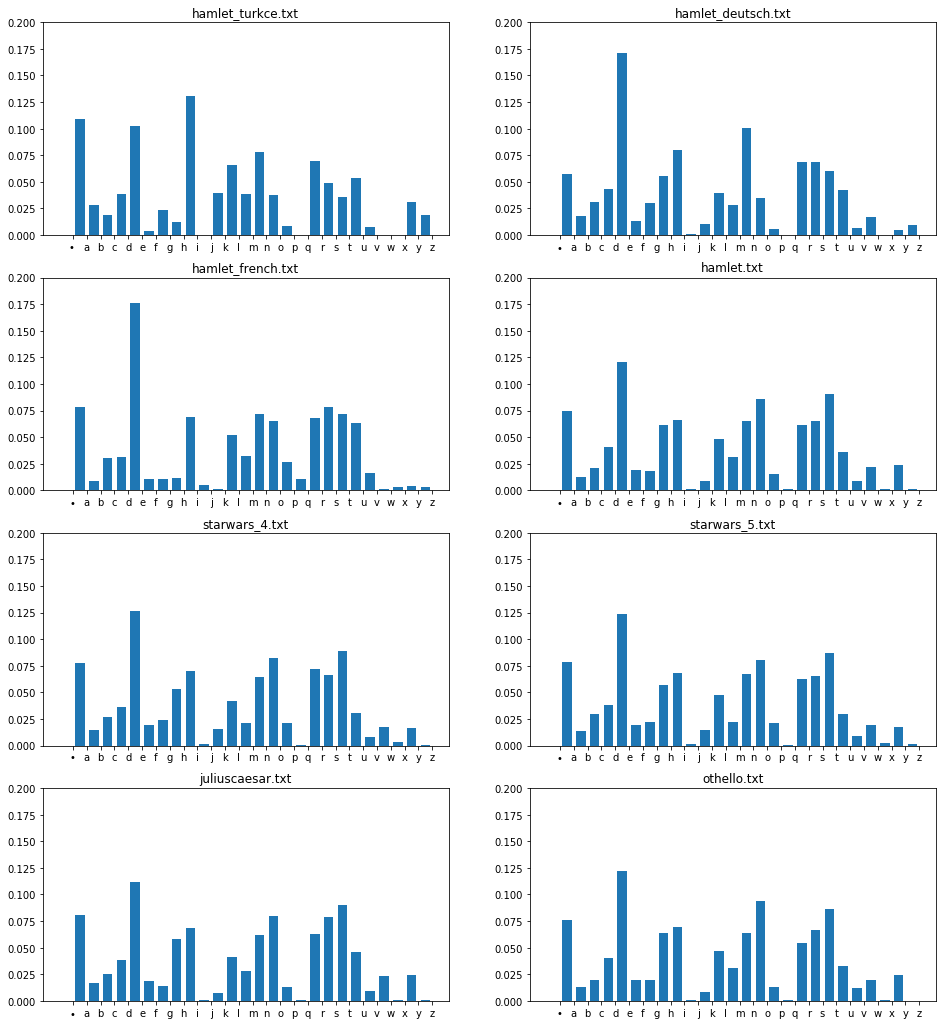

In [3]:
local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'
#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
files = ['hamlet_turkce.txt','hamlet_deutsch.txt', 'hamlet_french.txt', 'hamlet.txt','starwars_4.txt', 'starwars_5.txt','juliuscaesar.txt','othello.txt']

plt.figure(figsize=(16,18))

i = 0
for f in files:
    url = local+f
    data = urlopen(url) 
    #D, DD, alphabet = count_transitions(data, my_alphabet, {})
    D, DD, alphabet = count_transitions(data, ascii_alphabet, my2ascii_table)
    #D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)
    M = len(alphabet)
    # Ignore space, space transitions
    DD[0,0] = 1
    
    i+=1
    plt.subplot(len(files)/2,2,i)
        
    S = np.sum(DD,axis=0)
    #Subpress spaces
    S[0] = 0
    S = S/np.sum(S)

    plt.bar(np.arange(M)-0.5, S, width=0.7)
    plt.xticks(range(M), alphabet)
    plt.gca().set_ylim((0,0.2))
    plt.title(f)

plt.show()


## Counting Bigrams

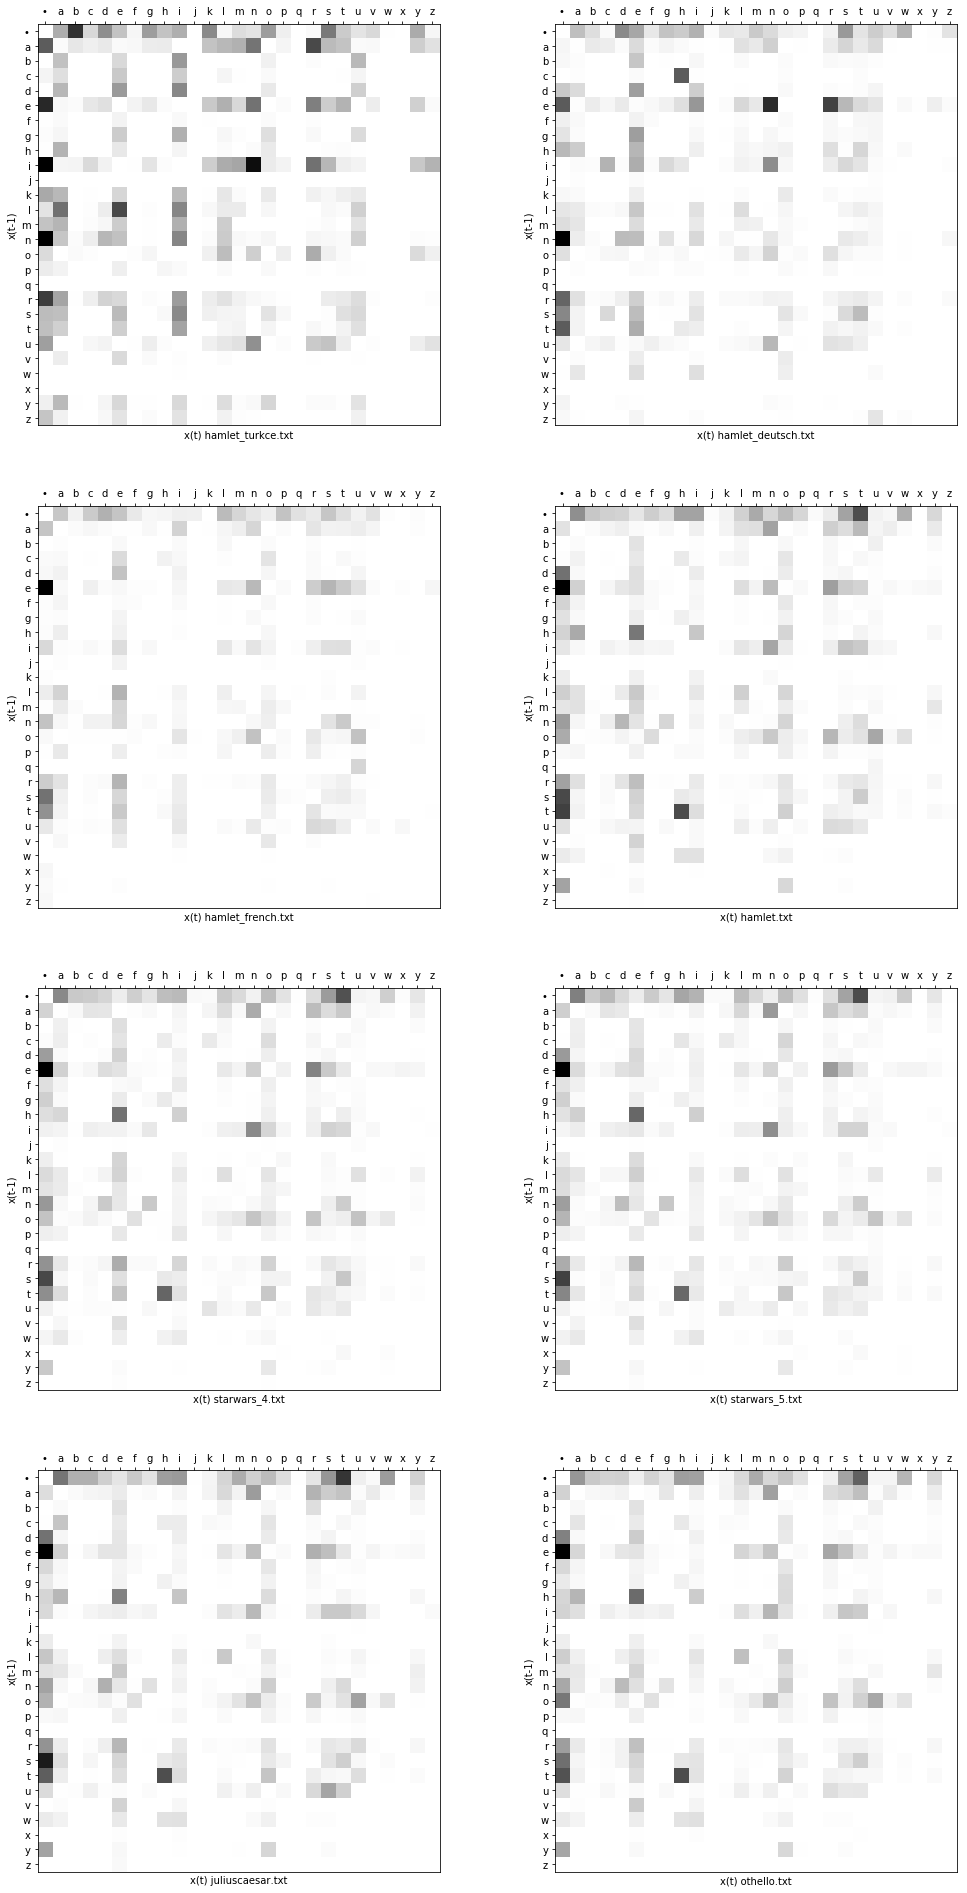

In [4]:
local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'

#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
files = ['hamlet_turkce.txt','hamlet_deutsch.txt', 'hamlet_french.txt', 'hamlet.txt','starwars_4.txt', 'starwars_5.txt','juliuscaesar.txt','othello.txt']

plt.figure(figsize=(17,2*17))

i = 0
for f in files:
    url = local+f
    data = urlopen(url) 
    #D, DD, alphabet = count_transitions(data, my_alphabet, {})
    D, DD, alphabet = count_transitions(data, ascii_alphabet, my2ascii_table)
    #D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)
    M = len(alphabet)
    DD[0,0] = 1
    
    i+=1
    plt.subplot(len(files)/2,2,i)
    plt.imshow(DD, interpolation='nearest', vmin=0,cmap='gray_r')
    plt.xticks(range(M), alphabet)
    plt.xlabel('x(t)')
    plt.yticks(range(M), alphabet)
    plt.ylabel('x(t-1)')
    ax = plt.gca()
    ax.xaxis.tick_top()
    #ax.set_title(f, va='bottom')
    plt.xlabel('x(t) '+f)
    

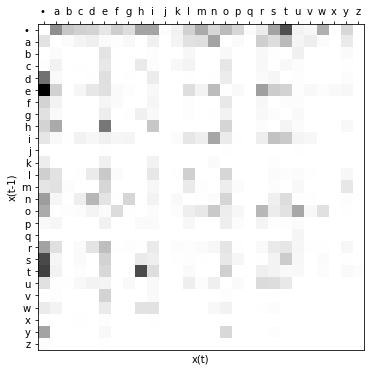

In [4]:
plt.figure(figsize=(6,6))

f = 'hamlet.txt'

url = local+f
data = urlopen(url) 
#D, DD, alphabet = count_transitions(data, my_alphabet, {})
D, DD, alphabet = count_transitions(data, ascii_alphabet, my2ascii_table)
#D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)
M = len(alphabet)
DD[0,0] = 1

plt.imshow(DD, interpolation='nearest', vmin=0,cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.xlabel('x(t)')
plt.yticks(range(M), alphabet)
plt.ylabel('x(t-1)')
ax = plt.gca()
ax.xaxis.tick_top()
#ax.set_title(f, va='bottom')
plt.xlabel('x(t)')

plt.savefig('transition.pdf',bbox_inches='tight')
plt.show()

### Normalized probability table of $p(x_t|x_{t-1})$

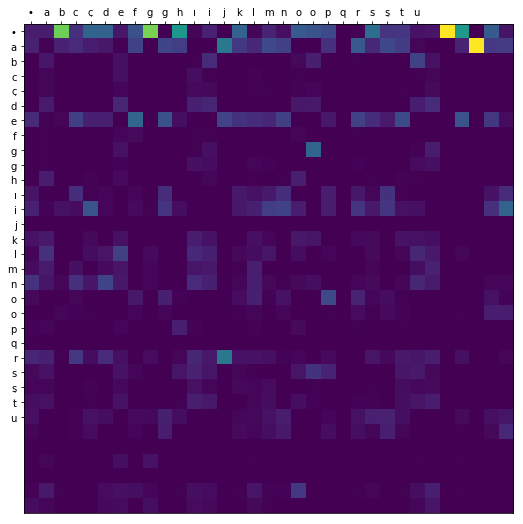

In [6]:

def normalize(A, axis=0):
    Z = np.sum(A, axis=axis,keepdims=True)
    idx = np.where(Z == 0)
    Z[idx] = 1
    return A/Z

local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'

file = 'hamlet_turkce.txt'
data = urlopen(local+file) 
D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)


plt.figure(figsize=(9,9))

T = normalize(DD, axis=0)


plt.imshow(T, interpolation='nearest', vmin=0)
plt.xticks(range(M), alphabet)
plt.yticks(range(M), alphabet)
plt.gca().xaxis.tick_top()

plt.show()

### Is Markov(0), Markov(1) or Markov(2) a better model for English letters in plain text ?

## Counting Words

In [7]:
def int_to_roman(input):
    """
    Convert an integer to Roman numerals.

    Examples:
    >>> int_to_roman(0)
    Traceback (most recent call last):
    ValueError: Argument must be between 1 and 3999

    >>> int_to_roman(-1)
    Traceback (most recent call last):
    ValueError: Argument must be between 1 and 3999

    >>> int_to_roman(1.5)
    Traceback (most recent call last):
    TypeError: expected integer, got <type 'float'>

    >>> for i in range(1, 21): print int_to_roman(i)
    ...
    I
    II
    III
    IV
    V
    VI
    VII
    VIII
    IX
    X
    XI
    XII
    XIII
    XIV
    XV
    XVI
    XVII
    XVIII
    XIX
    XX
    >>> print int_to_roman(2000)
    MM
    >>> print int_to_roman(1999)
    MCMXCIX
    """
    ints = (1000, 900,  500, 400, 100,  90, 50,  40, 10,  9,   5,  4,   1)
    nums = ('M',  'CM', 'D', 'CD','C', 'XC','L','XL','X','IX','V','IV','I')
    result = ""
    for i in range(len(ints)):
        count = int(input / ints[i])
        result += nums[i] * count
        input -= ints[i] * count
    return result



def roman_to_int(input):
    """
    Convert a roman numeral to an integer.

    >>> r = range(1, 4000)
    >>> nums = [int_to_roman(i) for i in r]
    >>> ints = [roman_to_int(n) for n in nums]
    >>> print r == ints
    1

    >>> roman_to_int('VVVIV')
    Traceback (most recent call last):
    ...
    ValueError: input is not a valid roman numeral: VVVIV
    >>> roman_to_int(1)
    Traceback (most recent call last):
    ...
    TypeError: expected string, got <type 'int'>
    >>> roman_to_int('a')
    Traceback (most recent call last):
    ...
    ValueError: input is not a valid roman numeral: A
    >>> roman_to_int('IL')
    Traceback (most recent call last):
    ...
    ValueError: input is not a valid roman numeral: IL
    """
    if type(input) != type(""):
        raise TypeError("expected string, got %s" % type(input))
    input = input.upper()
    nums = ['M', 'D', 'C', 'L', 'X', 'V', 'I']
    ints = [1000, 500, 100, 50,  10,  5,   1]
    places = []
    for c in input:
        if not c in nums:
            raise ValueError("input is not a valid roman numeral: %s" % input)
    for i in range(len(input)):
        c = input[i]
        value = ints[nums.index(c)]
        # If the next place holds a larger number, this value is negative.
        try:
            nextvalue = ints[nums.index(input[i +1])]
            if nextvalue > value:
                value *= -1
        except IndexError:
        # there is no next place.
            pass
        places.append(value)
    sum = 0
    for n in places: sum += n
    # Easiest test for validity...
    if int_to_roman(sum) == input:
        return sum
    else:
        raise ValueError('input is not a valid roman numeral: %s' % input)

In [8]:
from collections import defaultdict
from urllib.request import urlopen
import string
import numpy as np
import matplotlib.pyplot as plt


local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'
#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
files = ['hamlet.txt','starwars_4.txt', 'starwars_5.txt','juliuscaesar.txt','othello.txt']

i = 0
f = files[1]
url = local+f
fp = urlopen(url) 

i = 0

dic = {}

tb = str.maketrans(".\t\n\r,,;-","        ", '0123456789!"\#$%&()*/:<=>?@[\\]^_`{|}~+')

for line in fp:
    
    for w in line.decode().translate(tb).lower().split():
        key = w
        dic[key] = dic.setdefault(key,0) + 1
        

fp.close()

for k in sorted(dic.keys()):
    print(k,dic[k])

'cause 1
'em 3
'nother 1
a 780
aaah 1
abandoned 1
abide 1
abilities 1
ability 1
ablaze 1
able 10
aboard 9
about 79
above 11
absolutely 1
abyss 4
academy 6
accelerate 1
accelerates 1
accelerator 1
according 1
account 1
accurate 1
across 34
act 1
action 2
actions 1
activates 1
activity 4
actually 1
adam 1
added 1
additional 2
addresses 1
addressing 2
adequate 1
adjust 1
adjusting 1
adjustments 3
adjusts 18
admiral 2
adobe 1
advance 2
advances 2
advancing 2
advantage 1
adventurer 3
adventurers 1
adventures 1
advertisingpublicity 1
advice 1
afraid 7
aft 1
after 11
afterburners 1
afternoon 2
again 8
against 21
age 2
agents 1
aghast 1
agility 1
agitated 1
ago 3
agony 1
agree 1
agreement 5
agrees 2
ah 1
ahead 3
aide 2
aided 1
aides 1
aim 7
aimed 2
aiming 1
aims 5
ain't 6
air 10
aisle 1
al 1
alarm 4
alarmed 1
alarms 2
alcove 4
alderaan 25
alec 2
alert 6
alerted 1
alex 1
alexander 1
alien 5
alike 1
alive 3
all 94
alley 1
alleyway 6
alliance 3
allow 3
allowed 1
ally 1
almost 15
alone 5
along 16


dash 1
dashed 1
dashing 1
data 5
david 9
davidson 1
day 17
daze 1
dazzling 2
de 1
deactivate 1
deactivated 1
dead 13
deadly 4
deak 2
deak's 1
deal 1
dealer 1
death 230
deathly 1
debris 4
debts 1
deceive 1
deck 4
deco 1
decorator 1
decoy 1
decrease 1
deep 7
defense 2
defenses 1
defensive 2
defiance 1
deflect 2
deflection 1
deflector 4
deflectors 2
deftly 1
degrees 1
deliberately 1
delicate 1
delivered 2
deluxe 1
demand 1
demonstrate 2
demonstrated 1
demonstration 1
den 1
denham 1
dennis 2
dense 3
dented 3
depart 1
department 1
departure 1
depths 1
der 1
derek 1
descent 1
describing 1
desert 16
deserted 3
design 5
designed 1
designer 2
designs 1
desolate 1
desperate 2
destiny 2
destroy 6
destroyed 5
destructive 2
detachment 2
detention 12
determination 2
determined 3
detoo 18
device 17
device's 1
devices 2
devotion 2
dewaghi 1
dewbacks 1
dia 1
dialogue 1
diamond 1
diana 1
diane 1
did 21
didn 1
didn't 18
die 3
died 1
different 1
dig 1
dignitaries 1
dilley 1
dim 4
dimensional 2
dimly 1
din

kidding 2
kids 1
kill 3
killed 4
killer 1
killing 1
kim 1
kind 5
kiss 1
kisses 1
kitchen 3
kitchens 1
klaff 1
kline 1
kneel 1
knew 6
knicking 1
knight 5
knights 3
knock 1
knocked 2
knocks 2
know 39
knowledgeable 1
known 2
knows 2
koehler 1
kuran 1
kurtz 1
lack 1
lad 1
ladder 3
ladders 1
lamb 1
land 1
landing 1
landlocked 1
landscape 2
landspeeder 13
language 5
lanky 2
lap 1
large 30
larger 3
larry 1
lars 10
laser 55
laserbeams 2
laserblast 1
laserblasts 2
laserbolt 5
laserbolts 18
laserfire 28
lasers 6
last 18
lasted 1
latch 1
latches 1
late 4
lateral 1
laugh 2
laughing 7
laughs 4
laughter 2
laws 1
lawson 1
le 1
lead 3
leader 93
leader's 44
leaders 1
leading 5
leads 3
leak 2
lean 1
leaning 1
leans 3
learn 4
learned 1
learner 1
leash 1
least 2
leathery 1
leave 11
leaves 1
leaving 8
led 2
ledge 1
left 10
leg 2
legged 1
leia 140
leia's 2
lens 1
lenzi 1
leo 1
leon 1
leslie 2
less 2
lester 2
let 14
let's 12
lets 12
letting 1
level 7
levels 1
lever 6
levers 1
liability 1
librarians 1
lick 1


shooting 3
shoots 7
short 16
shot 7
shots 2
should 15
shoulder 8
shouldered 1
shoulders 4
shouldn't 1
shourt 2
shouting 1
shove 1
shoved 1
shoves 1
show 3
shower 3
showing 2
shows 2
shriek 1
shrieking 1
shrouded 5
shrugs 3
shudder 2
shudders 4
shut 16
shutting 3
shuttle 1
side 50
sides 5
sigh 1
sighing 1
sight 14
sights 2
sign 4
signal 4
signaled 1
signalman 1
signals 2
signed 1
signing 1
silenced 1
silently 2
silhouetted 2
silver 3
similar 3
simple 3
simpletons 1
simply 4
since 6
sinden 1
single 2
sinister 4
sink 1
sips 1
sir 43
sirens 1
sister 2
sit 7
sith 5
sits 12
sitting 5
situation 4
six 6
sixteen 3
sixty 1
size 6
sizes 1
sizing 1
skeptically 1
skim 3
skinner 1
skins 1
sky 4
skyhopper 2
skyhoppers 1
skywalker 6
slam 1
slams 1
slapping 1
slash 1
slaughter 1
slavering 1
slaving 1
sleazy 1
sleek 2
sleeping 1
slender 1
slide 1
slides 9
slight 5
slightly 7
slimy 7
slip 1
slips 2
slow 1
slowly 12
slug 1
slugs 1
slum 2
slump 1
small 57
smaller 4
smashed 2
smell 3
smile 5
smiles 5
smilin

In [9]:
sw = './data/books-eng/stopwords.txt'

f = open(sw,'r')
stopwords = []
for w in f:
    stopwords.append(w.strip())
    
for i in range(300):
    stopwords.append(int_to_roman(i).lower())

In [10]:
stopwords

['.',
 '-',
 '!',
 ':',
 'rt',
 'retweet',
 '&',
 '"',
 '""',
 ',',
 '(',
 ')',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes

In [11]:
from collections import defaultdict
from urllib.request import urlopen
import string
import numpy as np
import matplotlib.pyplot as plt


local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'
#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
#files = ['war_and_peace.txt','juliuscaesar.txt','macbeth.txt',  'hamlet.txt','othello.txt','sonnets.txt', 'romeoandjuliet.txt']
files = ['juliuscaesar.txt','antoniusandcleopatra.txt', 'hamlet.txt','romeoandjuliet.txt', 'othello.txt','sonnets.txt','starwars_4.txt', 'starwars_5.txt','starwars_6.txt']

tokens = {}
dic = {}
tb = str.maketrans(".\t\n\r,,;-","        ", '0123456789!"\'\#$%&()*/:<=>?@[\\]^_`{|}~+')

for file_index in range(len(files)):
    f = files[file_index]
    url = local+f
    fp = urlopen(url) 

    for line in fp:
        for w in line.decode().translate(tb).lower().split():
            key = w.strip()
            if key not in stopwords:
                dic[key] = dic.setdefault(key,len(dic))
                key2 = (dic[key],file_index)
                tokens[key2] = tokens.setdefault(key2, 0) + 1
            

    fp.close()

inv_dic = {dic[k]: k for k in dic.keys()}
len(dic)

14876

In [12]:
for i in range(len(inv_dic)):
    print(i,inv_dic[i])

0 act
1 scene
2 rome
3 street
4 enter
5 flavius
6 marullus
7 commoners
8 home
9 idle
10 creatures
11 holiday
12 mechanical
13 walk
14 labouring
15 day
16 sign
17 profession
18 speak
19 trade
20 art
21 thou
22 commoner
23 sir
24 carpenter
25 thy
26 leather
27 apron
28 rule
29 dost
30 apparel
31 respect
32 fine
33 workman
34 cobbler
35 answer
36 directly
37 hope
38 safe
39 conscience
40 mender
41 bad
42 soles
43 knave
44 naughty
45 nay
46 beseech
47 mend
48 meanest
49 saucy
50 fellow
51 cobble
52 live
53 awl
54 meddle
55 tradesmans
56 matters
57 womens
58 surgeon
59 shoes
60 great
61 danger
62 recover
63 proper
64 men
65 trod
66 neats
67 handiwork
68 wherefore
69 shop
70 today
71 lead
72 streets
73 wear
74 work
75 make
76 caesar
77 rejoice
78 triumph
79 conquest
80 brings
81 tributaries
82 follow
83 grace
84 captive
85 bonds
86 chariot
87 wheels
88 blocks
89 stones
90 worse
91 senseless
92 things
93 hard
94 hearts
95 cruel
96 knew
97 pompey
98 time
99 oft
100 climbd
101 walls
102 battlem

929 incorporate
930 attempts
931 stayd
932 sights
933 win
934 party
935 content
936 paper
937 praetors
938 chair
939 window
940 wax
941 statue
942 repair
943 trebonius
944 house
945 hie
946 bestow
947 papers
948 parts
949 entire
950 encounter
951 yields
952 sits
953 peoples
954 offence
955 richest
956 alchemy
957 conceited
958 midnight
959 awake
960 brutuss
961 orchard
962 lucius
963 progress
964 guess
965 soundly
966 calld
967 taper
968 study
969 lighted
970 call
971 spurn
972 crownd
973 nature
974 question
975 bright
976 adder
977 craves
978 wary
979 grant
980 sting
981 abuse
982 greatness
983 disjoins
984 remorse
985 truth
986 affections
987 swayd
988 reason
989 proof
990 lowliness
991 young
992 ambitions
993 ladder
994 whereto
995 climber
996 upward
997 turns
998 attains
999 upmost
1000 round
1001 scorning
1002 degrees
1003 ascend
1004 prevent
1005 quarrel
1006 augmented
1007 extremities
1008 serpents
1009 egg
1010 hatchd
1011 grow
1012 mischievous
1013 kill
1014 shell
1015 burneth

2040 teach
2041 fight
2042 stop
2043 corporal
2044 taught
2045 traind
2046 spirited
2047 feeds
2048 abjects
2049 orts
2050 imitations
2051 staled
2052 property
2053 levying
2054 powers
2055 alliance
2056 combined
2057 covert
2058 disclosed
2059 perils
2060 surest
2061 stake
2062 millions
2063 mischiefs
2064 camp
2065 sardis
2066 drum
2067 lucilius
2068 soldiers
2069 pindarus
2070 meeting
2071 salutation
2072 greets
2073 officers
2074 undone
2075 doubted
2076 received
2077 instances
2078 friendly
2079 cooling
2080 sicken
2081 decay
2082 useth
2083 tricks
2084 simple
2085 hollow
2086 gallant
2087 crests
2088 deceitful
2089 jades
2090 trial
2091 army
2092 arrived
2093 gently
2094 sober
2095 hides
2096 softly
2097 armies
2098 wrangle
2099 enlarge
2100 commanders
2101 charges
2102 guard
2103 wrongd
2104 condemnd
2105 noted
2106 pella
2107 taking
2108 bribes
2109 sardians
2110 praying
2111 slighted
2112 case
2113 nice
2114 comment
2115 itching
2116 sell
2117 mart
2118 offices
2119 undeserver

3407 snakes
3408 willt
3409 pearls
3410 thourt
3411 allay
3412 precedence
3413 gaoler
3414 malefactor
3415 pack
3416 infectious
3417 pestilence
3418 horrible
3419 balls
3420 unhair
3421 hales
3422 whippd
3423 wire
3424 stewd
3425 brine
3426 smarting
3427 lingering
3428 pickle
3429 match
3430 province
3431 hadst
3432 moving
3433 boot
3434 gift
3435 rogue
3436 knife
3437 innocent
3438 innocents
3439 scape
3440 thunderbolt
3441 kindly
3442 bite
3443 afeard
3444 hurt
3445 nobility
3446 meaner
3447 message
3448 host
3449 tongues
3450 felt
3451 submerged
3452 cistern
3453 scaled
3454 narcissus
3455 ugly
3456 crave
3457 offend
3458 punish
3459 unequal
3460 merchandise
3461 dispraised
3462 feature
3463 inclination
3464 gorgon
3465 tall
3466 chamber
3467 hostages
3468 written
3469 considerd
3470 twill
3471 discontented
3472 sicily
3473 perish
3474 chief
3475 factors
3476 father
3477 revengers
3478 ghosted
3479 conspire
3480 courtiers
3481 beauteous
3482 drench
3483 rig
3484 navy
3485 burthen
34

4593 miserable
4594 lament
4595 prince
4596 basely
4597 helmet
4598 countryman
4599 valiantly
4600 sty
4601 witherd
4602 pole
4603 girls
4604 level
4605 remarkable
4606 beneath
4607 visiting
4608 commanded
4609 milks
4610 chares
4611 sceptre
4612 injurious
4613 jewel
4614 alls
4615 scottish
4616 sin
4617 lamp
4618 spent
4619 briefest
4620 gallus
4621 frustrate
4622 mocks
4623 pauses
4624 haters
4625 pleasest
4626 dens
4627 moiety
4628 minister
4629 hired
4630 splitted
4631 staind
4632 persisted
4633 taints
4634 rarer
4635 steer
4636 humanity
4637 spacious
4638 lance
4639 diseases
4640 bodies
4641 declining
4642 stall
4643 top
4644 design
4645 mate
4646 unreconciliable
4647 equalness
4648 meeter
4649 confined
4650 intents
4651 preparedly
4652 speediest
4653 employd
4654 calm
4655 desolation
4656 paltry
4657 shackles
4658 bolts
4659 palates
4660 dug
4661 nurse
4662 demands
4663 meanst
4664 greatly
4665 trusting
4666 princely
4667 reference
4668 flows
4669 dependency
4670 hourly
4671 doct

5797 tyrannous
5798 sized
5799 coagulate
5800 gore
5801 carbuncles
5802 hellish
5803 grandsire
5804 priam
5805 fore
5806 accent
5807 striking
5808 greeks
5809 antique
5810 rebellious
5811 repugnant
5812 matchd
5813 whiff
5814 unnerved
5815 ilium
5816 flaming
5817 stoops
5818 crash
5819 milky
5820 reverend
5821 stick
5822 neutral
5823 region
5824 aroused
5825 vengeance
5826 sets
5827 cyclops
5828 marss
5829 eterne
5830 spokes
5831 fellies
5832 nave
5833 fiends
5834 barbers
5835 jig
5836 bawdry
5837 hecuba
5838 mobled
5839 barefoot
5840 bisson
5841 clout
5842 lank
5843 teemed
5844 blanket
5845 alarm
5846 pronounced
5847 mincing
5848 clamour
5849 milch
5850 burning
5851 bestowed
5852 chronicles
5853 epitaph
5854 desert
5855 bodykins
5856 whipping
5857 gonzago
5858 dozen
5859 sixteen
5860 insert
5861 peasant
5862 fiction
5863 wannd
5864 function
5865 suiting
5866 cue
5867 appal
5868 muddy
5869 mettled
5870 peak
5871 john
5872 unpregnant
5873 breaks
5874 pate
5875 plucks
5876 tweaks
5877 sw

6999 comma
7000 amities
7001 ases
7002 contents
7003 debatement
7004 shriving
7005 ordinant
7006 signet
7007 model
7008 folded
7009 subscribed
7010 gavet
7011 impression
7012 changeling
7013 sequent
7014 insinuation
7015 opposites
7016 whored
7017 poppd
7018 cozenage
7019 portraiture
7020 towering
7021 crib
7022 mess
7023 chough
7024 diligence
7025 bonnet
7026 northerly
7027 sultry
7028 exceedingly
7029 differences
7030 society
7031 showing
7032 feelingly
7033 definement
7034 perdition
7035 inventorially
7036 dizzy
7037 arithmetic
7038 yaw
7039 verity
7040 extolment
7041 infusion
7042 rareness
7043 diction
7044 umbrage
7045 infallibly
7046 concernancy
7047 wrap
7048 rawer
7049 nomination
7050 weapon
7051 imputation
7052 meed
7053 unfellowed
7054 wagered
7055 barbary
7056 imponed
7057 poniards
7058 assigns
7059 girdle
7060 hangers
7061 carriages
7062 responsive
7063 edified
7064 margent
7065 german
7066 passes
7067 lapwing
7068 sucked
7069 bevy
7070 dressy
7071 dotes
7072 yesty
7073 win

8310 conjurations
8311 felon
8312 betossed
8313 rode
8314 misfortunes
8315 lantern
8316 interrd
8317 keepers
8318 crimson
8319 sunder
8320 unsubstantial
8321 paramour
8322 inauspicious
8323 righteous
8324 dateless
8325 engrossing
8326 unsavoury
8327 dashing
8328 rocks
8329 stumbled
8330 vainly
8331 grubs
8332 eyeless
8333 discern
8334 fearfully
8335 masterless
8336 gory
8337 discolourd
8338 comfortable
8339 contradict
8340 thwarted
8341 sisterhood
8342 nuns
8343 timeless
8344 churl
8345 restorative
8346 snatching
8347 sheath
8348 rust
8349 whoeer
8350 attach
8351 descry
8352 trembles
8353 suspicion
8354 outcry
8355 startles
8356 tombs
8357 bleeds
8358 mistaen
8359 sheathed
8360 warns
8361 stoppd
8362 conspires
8363 untaught
8364 ambiguities
8365 descent
8366 suspected
8367 direful
8368 impeach
8369 excused
8370 pined
8371 betrothd
8372 tutord
8373 potions
8374 prefixed
8375 awaking
8376 scare
8377 miscarried
8378 sacrificed
8379 rigour
8380 severest
8381 threatened
8382 countys
8383 fr

9445 tillage
9446 unthrifty
9447 bequest
9448 largess
9449 acceptable
9450 tombd
9451 executor
9452 unfair
9453 excel
9454 oersnowd
9455 bareness
9456 distillation
9457 pent
9458 leese
9459 ragged
9460 deface
9461 usury
9462 happies
9463 happier
9464 refigured
9465 resembling
9466 reeleth
9467 tract
9468 concord
9469 unions
9470 string
9471 ordering
9472 sire
9473 widows
9474 consumest
9475 issueless
9476 makeless
9477 unthrift
9478 enjoys
9479 user
9480 unprovident
9481 evident
9482 ruinate
9483 wane
9484 growest
9485 departest
9486 youngly
9487 bestowest
9488 convertest
9489 threescore
9490 featureless
9491 barrenly
9492 endowd
9493 carved
9494 print
9495 copy
9496 sunk
9497 erst
9498 girded
9499 sheaves
9500 bristly
9501 lease
9502 yourselfs
9503 uphold
9504 stormy
9505 gusts
9506 unthrifts
9507 astronomy
9508 dearths
9509 predict
9510 derive
9511 prognosticate
9512 presenteth
9513 cheered
9514 vaunt
9515 decrease
9516 wasteful
9517 debateth
9518 sullied
9519 engraft
9520 fortify
95

10566 busted
10567 skyhopper
10568 owen
10569 upset
10570 hottest
10571 bushpilot
10572 mos
10573 eisley
10574 skyhoppers
10575 whammo
10576 canyon
10577 starships
10578 missed
10579 kid
10580 havent
10581 shouldnt
10582 seriousness
10583 frigate
10584 central
10585 systems
10586 stunned
10587 kidding
10588 ya
10589 crater
10590 bestine
10591 contact
10592 crazy
10593 forever
10594 spreading
10595 application
10596 sandpeople
10597 raided
10598 outskirts
10599 colony
10600 blaster
10601 vaporators
10602 starting
10603 nationalize
10604 tenant
10605 slaving
10606 couldnt
10607 bother
10608 someday
10609 lookout
10610 drafted
10611 starfleet
10612 gargantuan
10613 formations
10614 shrouded
10615 onimous
10616 unearthly
10617 cautiously
10618 creepy
10619 inadvertently
10620 clicking
10621 pepple
10622 tumbles
10623 flicker
10624 recesses
10625 unsuspecting
10626 waddles
10627 engulfs
10628 eerie
10629 manages
10630 topples
10631 jawas
10632 taller
10633 holster
10634 complex
10635 grubby

11777 massassi
11778 outpost
11779 countryside
11780 sours
11781 foliage
11782 rotting
11783 unimaginable
11784 crumbling
11785 willard
11786 composes
11787 formally
11788 tracked
11789 pointedly
11790 ominously
11791 interrupted
11792 discussion
11793 preparing
11794 briefing
11795 dodonna
11796 display
11797 starpilots
11798 navigators
11799 sprinkling
11800 intently
11801 shielded
11802 firepower
11803 defenses
11804 designed
11805 penetrate
11806 outer
11807 addresses
11808 snub
11809 theyd
11810 analysis
11811 maneuver
11812 skim
11813 meters
11814 thermal
11815 exhaust
11816 reaction
11817 murmer
11818 disbelief
11819 proton
11820 torpedoes
11821 wedge
11822 hotshot
11823 bulls
11824 womp
11825 intertwines
11826 relation
11827 orbiting
11828 maximum
11829 velocity
11830 spacefighters
11831 crews
11832 armaments
11833 unlocking
11834 couplings
11835 isolated
11836 activity
11837 loudspeaker
11838 deliberately
11839 debts
11840 suicide
11841 hesitates
11842 lookin
11843 howd
11844 

13048 encased
13049 smashes
13050 gasps
13051 priority
13052 avenger
13053 bizarre
13054 bossk
13055 bloodshot
13056 zuckuss
13057 dengar
13058 mangy
13059 ig
13060 disintegrations
13061 harmlessly
13062 subside
13063 steeply
13064 corrects
13065 expecting
13066 puzzlement
13067 surviving
13068 weaves
13069 numerous
13070 avengers
13071 imperials
13072 stationed
13073 nears
13074 track
13075 cloaking
13076 communications
13077 update
13078 apologize
13079 bowling
13080 wavers
13081 concentrate
13082 chirping
13083 lakes
13084 uncertainly
13085 unlearn
13086 focusing
13087 disappearing
13088 luminous
13089 beings
13090 crude
13091 sweeping
13092 gesturing
13093 discouraged
13094 bowed
13095 beach
13096 astonishment
13097 includes
13098 needas
13099 accepted
13100 slumps
13101 destination
13102 trajectory
13103 uneasy
13104 glides
13105 aware
13106 clinging
13107 standard
13108 procedure
13109 float
13110 anoat
13111 lando
13112 mapscreen
13113 landos
13114 calrissian
13115 gambler
13116

14234 constuction
14235 bill
14236 welch
14237 irvin
14238 foreman
14239 iiams
14240 callas
14241 clause
14242 elliot
14243 stan
14244 wakashige
14245 laborer
14246 foremen
14247 fukuzawa
14248 johnson
14249 clark
14250 standby
14251 giovanni
14252 ferrara
14253 sketch
14254 carnon
14255 scenic
14256 ted
14257 michell
14258 steven
14259 sallybanks
14260 decor
14261 lettering
14262 dickinson
14263 draftsmen
14264 reg
14265 bream
14266 billerman
14267 campell
14268 djurkovic
14269 gavin
14270 bocquet
14271 kevin
14272 phipps
14273 buyers
14274 lusby
14275 giladjian
14276 storeman
14277 middleton
14278 secretary
14279 carol
14280 regan
14281 glennon
14282 lowin
14283 cameramen
14284 mills
14285 laughridge
14286 benson
14287 puller
14288 frift
14289 napolitano
14290 bonge
14291 tate
14292 martin
14293 kenzie
14294 gaffers
14295 pantages
14296 bremner
14297 herron
14298 helicopter
14299 wolfe
14300 dick
14301 dova
14302 spah
14303 dolly
14304 chunky
14305 huse
14306 stanley
14307 sayer
1430

In [13]:
i = 0
for k in dic.keys():
    print(k)
    i+=1
    if i>20000:
        break

act
scene
rome
street
enter
flavius
marullus
commoners
home
idle
creatures
holiday
mechanical
walk
labouring
day
sign
profession
speak
trade
art
thou
commoner
sir
carpenter
thy
leather
apron
rule
dost
apparel
respect
fine
workman
cobbler
answer
directly
hope
safe
conscience
mender
bad
soles
knave
naughty
nay
beseech
mend
meanest
saucy
fellow
cobble
live
awl
meddle
tradesmans
matters
womens
surgeon
shoes
great
danger
recover
proper
men
trod
neats
handiwork
wherefore
shop
today
lead
streets
wear
work
make
caesar
rejoice
triumph
conquest
brings
tributaries
follow
grace
captive
bonds
chariot
wheels
blocks
stones
worse
senseless
things
hard
hearts
cruel
knew
pompey
time
oft
climbd
walls
battlements
towers
windows
yea
chimney
tops
infants
arms
sat
livelong
patient
expectation
pass
made
universal
shout
tiber
trembled
underneath
banks
hear
replication
sounds
concave
shores
put
attire
cull
strew
flowers
pompeys
blood
run
houses
fall
knees
pray
gods
intermit
plague
light
ingratitude
good
country

compact
prickd
depend
savage
spectacle
regard
produce
funeral
consent
utter
protest
permission
contented
rites
lawful
advantage
speech
devise
dot
ended
meek
ruins
lived
tide
shed
costly
prophesy
dumb
mouths
ruby
utterance
domestic
fury
cumber
objects
familiar
quarterd
custom
ranging
revenge
ate
hot
confines
monarchs
havoc
slip
dogs
foul
smell
carrion
burial
serve
octavius
letters
coming
big
catching
beads
sorrow
began
water
leagues
post
mourning
safety
shalt
borne
oration
issue
discourse
lend
forum
audience
numbers
rendered
citizen
compare
ascended
lovers
silent
censure
senses
judge
assembly
demand
rose
slaves
slew
joy
fortune
offended
rude
pause
reply
enrolled
glory
extenuated
offences
enforced
suffered
mourned
commonwealth
fourth
shouts
clamours
sake
corpse
allowd
beholding
finds
twere
blest
rid
bury
praise
evil
lives
interred
bones
grievous
grievously
faithful
captives
ransoms
coffers
fill
wept
sterner
stuff
presented
kingly
refuse
disprove
withholds
mourn
brutish
coffin
methinks
sa

spend
persuade
incline
sorely
bounty
unloading
mules
safed
bringer
donet
continues
turpitude
swifter
outstrike
ditch
foulst
fits
camps
oppression
exceeds
droven
clouts
bleedst
bench
scotches
score
backs
snatch
hares
maul
runner
reward
spritely
halt
gests
spill
escaped
doughty
handed
shown
hectors
clip
feats
joyful
congealment
gashes
attended
fairy
chain
harness
pants
triumphing
snare
uncaught
nightingale
grey
younger
nourishes
nerves
goal
favouring
warrior
mankind
destroyd
carbuncled
car
targets
capacity
carouses
peril
trumpeters
brazen
din
blast
citys
rattling
tabourines
applauding
sentinels
relieved
court
shiny
embattle
tos
record
melancholy
poisonous
damp
disponge
hardness
dried
powder
finish
infamous
register
leaver
sleeps
swoons
raught
afar
demurely
sleepers
weld
adjoining
haven
appointment
endeavour
charged
taket
galleys
vales
pine
swallows
built
nests
grimly
dejected
starts
fretted
betrayed
carouse
sold
novice
uprise
spanield
discandy
sweets
blossoming
barkd
overtoppd
beckd
crow

forgetting
unseal
exact
sorts
englands
bugs
goblins
supervise
bated
grinding
netted
villanies
statists
yeomans
conjuration
tributary
wheaten
comma
amities
ases
contents
debatement
shriving
ordinant
signet
model
folded
subscribed
gavet
impression
changeling
sequent
insinuation
opposites
whored
poppd
cozenage
portraiture
towering
crib
mess
chough
diligence
bonnet
northerly
sultry
exceedingly
differences
society
showing
feelingly
definement
perdition
inventorially
dizzy
arithmetic
yaw
verity
extolment
infusion
rareness
diction
umbrage
infallibly
concernancy
wrap
rawer
nomination
weapon
imputation
meed
unfellowed
wagered
barbary
imponed
poniards
assigns
girdle
hangers
carriages
responsive
edified
margent
german
passes
lapwing
sucked
bevy
dressy
dotes
yesty
winnowed
bubbles
fitness
whensoever
instructs
continual
forestall
augury
sparrow
readiness
pardont
punishd
exception
denies
disclaiming
arrow
reconcilement
ungored
darkest
betterd
exchange
union
successive
cannoneer
cannons
dunks
judges


undertook
heathenish
roderigos
upbraids
relate
perplexd
indian
albeit
medicinal
aleppo
malignant
turband
circumcised
spartan
hunger
tragic
loading
succeed
sonnets
begetter
insuing
mr
wisheth
wishing
adventurer
riper
decease
feedst
lightst
fuel
abundance
buriest
niggarding
glutton
beseige
trenches
gazed
sunken
thriftless
proving
feelst
viewest
renewest
unbless
uneard
disdains
tillage
unthrifty
bequest
largess
acceptable
tombd
executor
unfair
excel
oersnowd
bareness
distillation
pent
leese
ragged
deface
usury
happies
happier
refigured
resembling
reeleth
tract
concord
unions
string
ordering
sire
widows
consumest
issueless
makeless
unthrift
enjoys
user
unprovident
evident
ruinate
wane
growest
departest
youngly
bestowest
convertest
threescore
featureless
barrenly
endowd
carved
print
copy
sunk
erst
girded
sheaves
bristly
lease
yourselfs
uphold
stormy
gusts
unthrifts
astronomy
dearths
predict
derive
prognosticate
presenteth
cheered
vaunt
decrease
wasteful
debateth
sullied
engraft
fortify
unse

pitched
billows
representing
brightly
cleared
barrels
unleashes
wingman
locate
yahoo
colliding
crashes
circles
flanking
levers
hugs
slapping
playfully
shoves
fried
gears
donate
neat
rows
solemnly
aisle
shined
pristine
awestruck
dignitaries
staggeringly
medallion
repeats
disolve
credits
gary
kurtz
starring
hamill
harrison
ford
carrie
cushing
alec
guinness
daniels
kenny
baker
mayhew
david
prowse
purvis
eddie
byrne
production
designer
barry
director
photography
gilbert
taylor
williams
performed
london
symphony
orchestra
copyright
fanfare
photographic
dykstra
stears
editiors
paul
hirsch
marcia
richard
robert
watts
illustration
ralph
mcquarrie
costume
mollo
directors
reynolds
leslie
dilley
stuart
freeborn
mixer
derek
casting
irene
diane
crittenden
vic
ramos
supervising
editor
sam
shaw
dialogue
burtt
editors
rutledge
gordon
davidson
gene
corso
kenneth
wannberg
rerecording
mixers
macdougall
minkler
litt
lester
fresholtz
portman
dolby
consultant
katz
orchestrations
herbert
spencer
eric
tomlins

plastic
sculptural
wiley
sculptors
dave
carson
mcvey
sosalla
judy
elkins
howarth
cheif
moldmaker
wesley
randy
dutra
kirk
thatcher
isaac
turner
jeanne
lauren
ethan
hanson
rodger
consultants
walas
productioncreature
ordinator
patty
blau
latex
lab
mclaughlin
animatronics
engineers
coppinger
elizabeth
janet
tebrooke
jenny
jeweler
wardrode
patrickwheatley
wilcon
murphy
jeffrey
keith
morton
birkinshaw
costumers
kassal
edwin
pellikka
anne
polland
elvira
angelinetta
mick
becker
claudia
everett
laurie
rudd
nancy
servin
karrin
kain
derik
hyde
maggie
patte
janice
gartin
julie
woodbridge
gillett
rita
wakely
eileen
sullivan
hancock
torbett
supervisors
coangelo
lofthouse
holly
ivan
perre
propmakers
hargreaves
plasterer
clarke
shirtcliffe
rigger
stagehabd
burke
ordinators
kreysler
tompkins
engineering
derrick
baylis
peggy
kashuba
dawe
thom
batchelor
shep
manson
audio
christopher
kris
handwerk
kelly
marty
dennie
thorpe
watson
catherine
coombs
hodenfield
kessler
leahy
lyrics
huttesse
holman
starkey
con

In [14]:
import numpy as np

M = len(dic)
N = len(files)

X = np.zeros((M,N))

for t in tokens.keys():
    X[t[0],t[1]] = 1


In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np



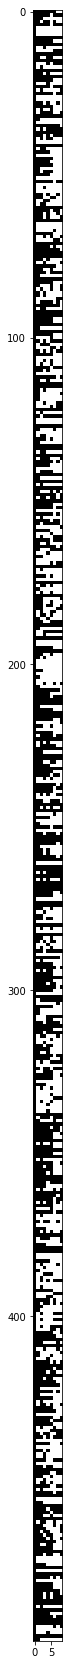

In [16]:

plt.figure(figsize=(5,30))
plt.imshow(X[0:500], interpolation='nearest',cmap='gray_r')
plt.show()

In [17]:
U, S, V = np.linalg.svd(X, full_matrices=0)

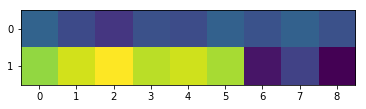

In [18]:
plt.imshow(V[0:2,:], interpolation='nearest')
plt.show()

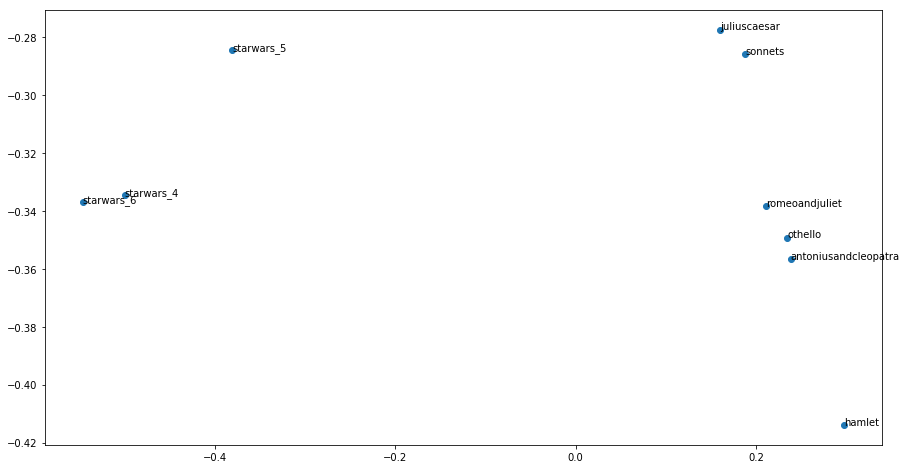

In [19]:
plt.figure(figsize=(15,8))
yy = V[0,:]
xx = V[1,:]
plt.plot(xx,yy,'o')
for i,f in enumerate(files):    
    plt.text(xx[i],yy[i], f.replace('.txt',''),)
    
plt.show()

In [106]:
A = np.random.randn(5,4)
U, S, V = np.linalg.svd(A, full_matrices=0)

print(A)
U.dot(np.diag(S).dot(V))

[[ 1.01834013  1.05454084 -0.12569335 -0.653327  ]
 [-0.45919089 -0.06093191  0.12748957 -2.08990518]
 [-0.00671268 -1.76737174 -0.66098001  1.15241306]
 [ 1.74487422  1.55593577 -1.21950539  0.64542144]
 [-0.99008952  1.15882457 -0.54206921 -0.35055043]]


array([[ 1.01834013,  1.05454084, -0.12569335, -0.653327  ],
       [-0.45919089, -0.06093191,  0.12748957, -2.08990518],
       [-0.00671268, -1.76737174, -0.66098001,  1.15241306],
       [ 1.74487422,  1.55593577, -1.21950539,  0.64542144],
       [-0.99008952,  1.15882457, -0.54206921, -0.35055043]])

In [ ]:
import nltk
from utils import tokenizer
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from numpy import log, mean
import json, csv, re
import pprint as pp

tokens = nltk.word_tokenize(txt)